## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

## Dataset

In [2]:
# Dataset path
dataset_path = "/Users/pathfinder/Documents/GitHub/Kaggle/LMSYS - Chatbot Arena Human Preference Predictions/data"

In [3]:
# Load dataset
train_df = pd.read_csv(f"{dataset_path}/train.csv")
test_df = pd.read_csv(f"{dataset_path}/test.csv")

In [4]:
# Display train dataset
display(train_df.head())

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [5]:
# Display the first prompt and responses
print('=============== Prompt ===============')
print(eval(train_df.loc[0]['prompt'])[0])
print()
print(f"=============== Model A [{train_df.loc[0]['model_a']}] ===============")
print(eval(train_df.loc[0]['response_a'])[0])
print()
print(f"=============== Model B [{train_df.loc[0]['model_b']}] ===============")
print(eval(train_df.loc[0]['response_b'])[0])
print()
if train_df.loc[0]['winner_model_a'] == 1:
    print(f"Winner: [{train_df.loc[0]['model_a']}]")
elif train_df.loc[0]['winner_model_b'] == 1:
    print(f"Winner: [{train_df.loc[0]['model_b']}]")
else:
    print(f"Winner: Tie")

=============== Prompt ===============
Is it morally right to try to have a certain percentage of females on managerial positions?

=============== Model A [gpt-4-1106-preview] ===============
The question of whether it is morally right to aim for a certain percentage of females in managerial positions is a complex ethical issue that involves considerations of fairness, equality, diversity, and discrimination.

Here are some arguments in favor of and against such policies:

**Arguments in favor:**

1. **Correcting Historical Inequities:** Women have historically been underrepresented in leadership roles due to various cultural, institutional, and social barriers. Aiming for a specific percentage can be seen as a corrective measure to address past and ongoing discrimination.

2. **Promoting Diversity:** Diverse leadership teams can enhance decision-making and represent a broader range of perspectives. This can lead to better outcomes for organizations and society as a whole.

3. **Equal

## Data Analysis

In [6]:
# Display train dataset info
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57477 entries, 0 to 57476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              57477 non-null  int64 
 1   model_a         57477 non-null  object
 2   model_b         57477 non-null  object
 3   prompt          57477 non-null  object
 4   response_a      57477 non-null  object
 5   response_b      57477 non-null  object
 6   winner_model_a  57477 non-null  int64 
 7   winner_model_b  57477 non-null  int64 
 8   winner_tie      57477 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB


None

In [7]:
# Display the number of rows
print(f"Number of rows: {train_df.shape[0]}")

Number of rows: 57477


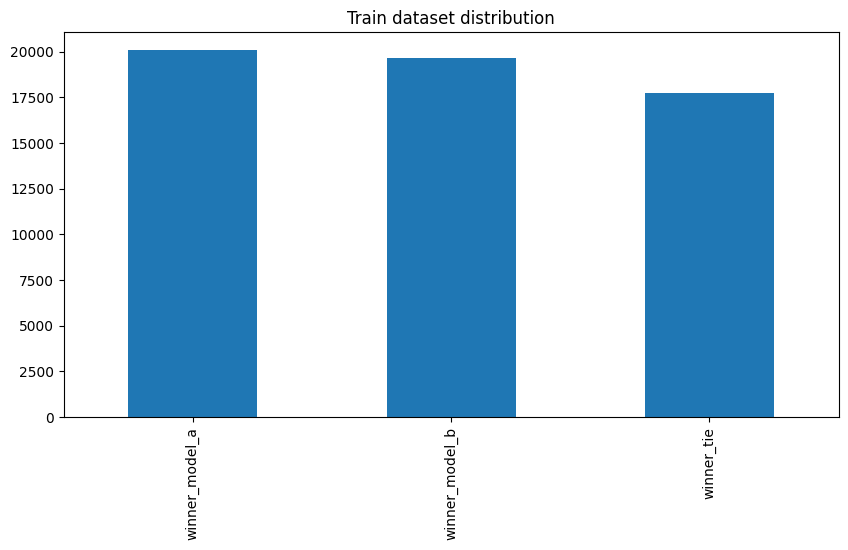

In [8]:
# Visualize the train dataset distribution
plt.figure(figsize=(10, 5))
train_df[["winner_model_a", "winner_model_b", "winner_tie"]].sum().plot(kind="bar")
plt.title("Train dataset distribution")
plt.show()

In [9]:
# Check for missing values
train_df.isnull().sum()

id                0
model_a           0
model_b           0
prompt            0
response_a        0
response_b        0
winner_model_a    0
winner_model_b    0
winner_tie        0
dtype: int64

In [10]:
# Check for duplicates

# number of duplicates of rows
print(f"Number of duplicates of rows: {train_df.duplicated().sum()}")
# number of duplicates of prompts
print(f"Number of duplicates of prompts: {train_df['prompt'].duplicated().sum()}")
# number of duplicates of responses
print(f"Number of duplicates of responses: {train_df[['response_a', 'response_b']].duplicated().sum()}")
# number of duplicates of prompt-response pairs
print(f"Number of duplicates of prompt-response pairs: {train_df[['prompt', 'response_a', 'response_b']].duplicated().sum()}")
# number of duplicates of prompt-response pairs with same model
print(f"Number of duplicates of prompt-response pairs with same model: {train_df[['prompt', 'response_a', 'response_b', 'model_a', 'model_b']].duplicated().sum()}")
# number of duplicates of prompt-response pairs with same model and same winner
print(f"Number of duplicates of prompt-response pairs with same model and same winner: {train_df[['prompt', 'response_a', 'response_b', 'model_a', 'model_b', 'winner_model_a', 'winner_model_b', 'winner_tie']].duplicated().sum()}")

Number of duplicates of rows: 0
Number of duplicates of prompts: 5743
Number of duplicates of responses: 186
Number of duplicates of prompt-response pairs: 71
Number of duplicates of prompt-response pairs with same model: 8
Number of duplicates of prompt-response pairs with same model and same winner: 7


In [11]:
# Display the number of models
print(f"Number of models: {pd.concat([train_df['model_a'], train_df['model_b']]).nunique()}")

Number of models: 64


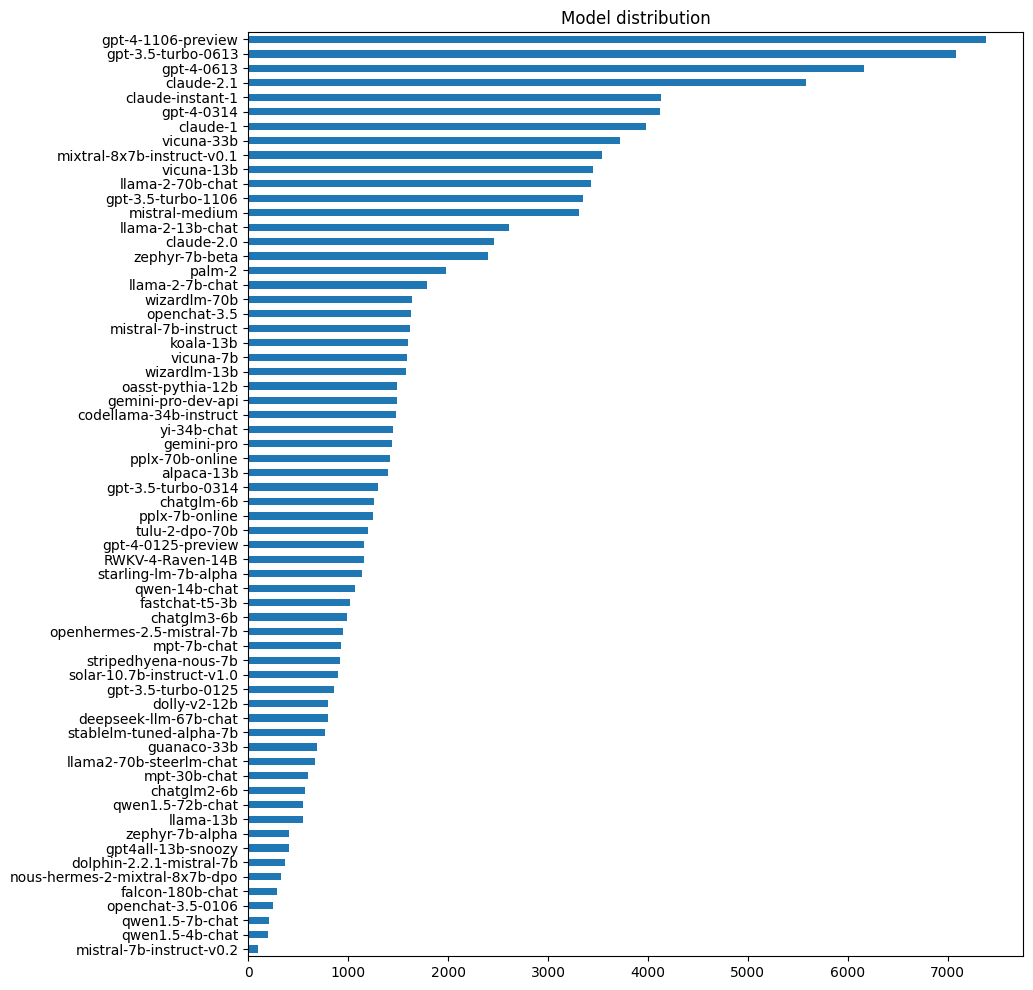

In [12]:
# Display the model distribution
plt.figure(figsize=(10, 12))
pd.concat([train_df["model_a"], train_df["model_b"]]).value_counts().sort_values().plot(kind="barh")
plt.title("Model distribution")
plt.show()

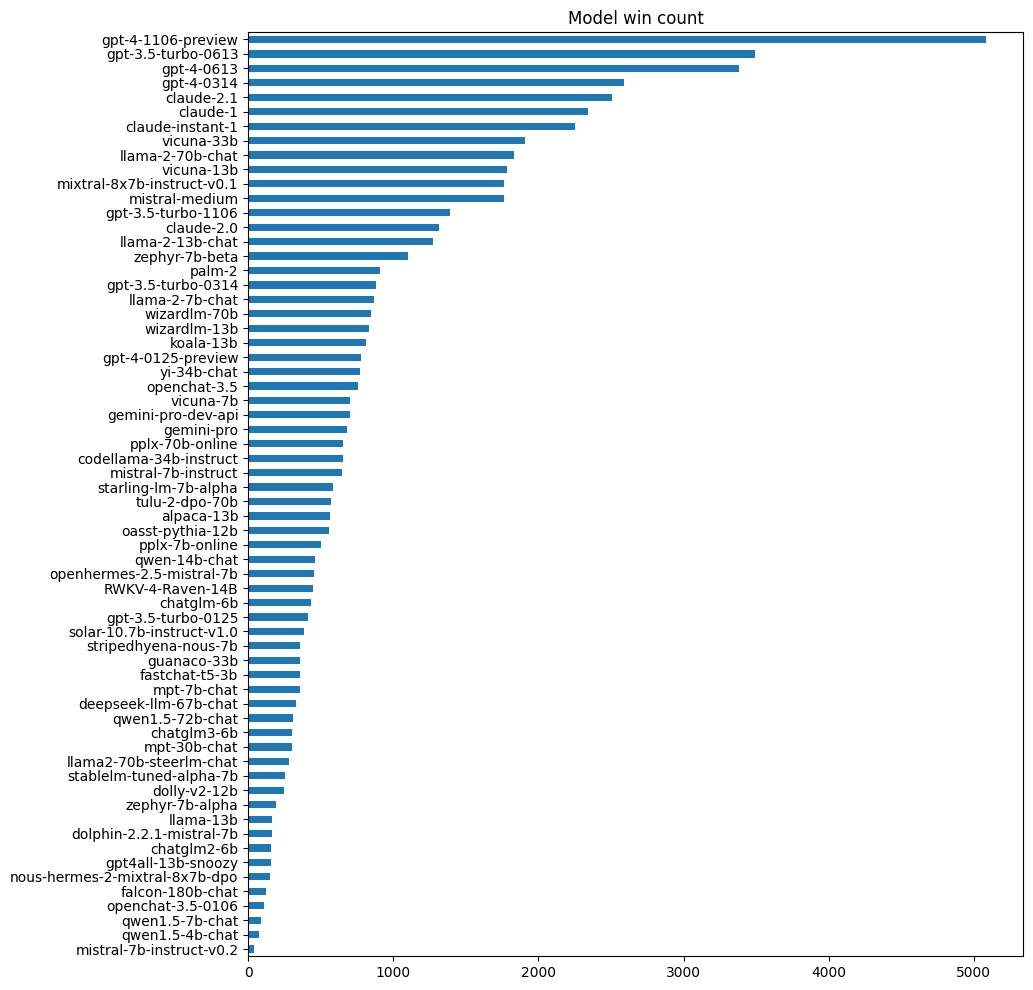

In [13]:
# Visualize model win count
model_list = pd.concat([train_df["model_a"], train_df["model_b"]]).unique()
model_win_count = {model: 0 for model in model_list}
for index, row in train_df.iterrows():
    if row["winner_model_a"] == 1:
        model_win_count[row["model_a"]] += 1
    elif row["winner_model_b"] == 1:
        model_win_count[row["model_b"]] += 1
    else:
        model_win_count[row["model_a"]] += 0.5
        model_win_count[row["model_b"]] += 0.5
model_win_count = dict(sorted(model_win_count.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 12))
pd.Series(model_win_count).sort_values().plot(kind="barh")
plt.title("Model win count")
plt.show()

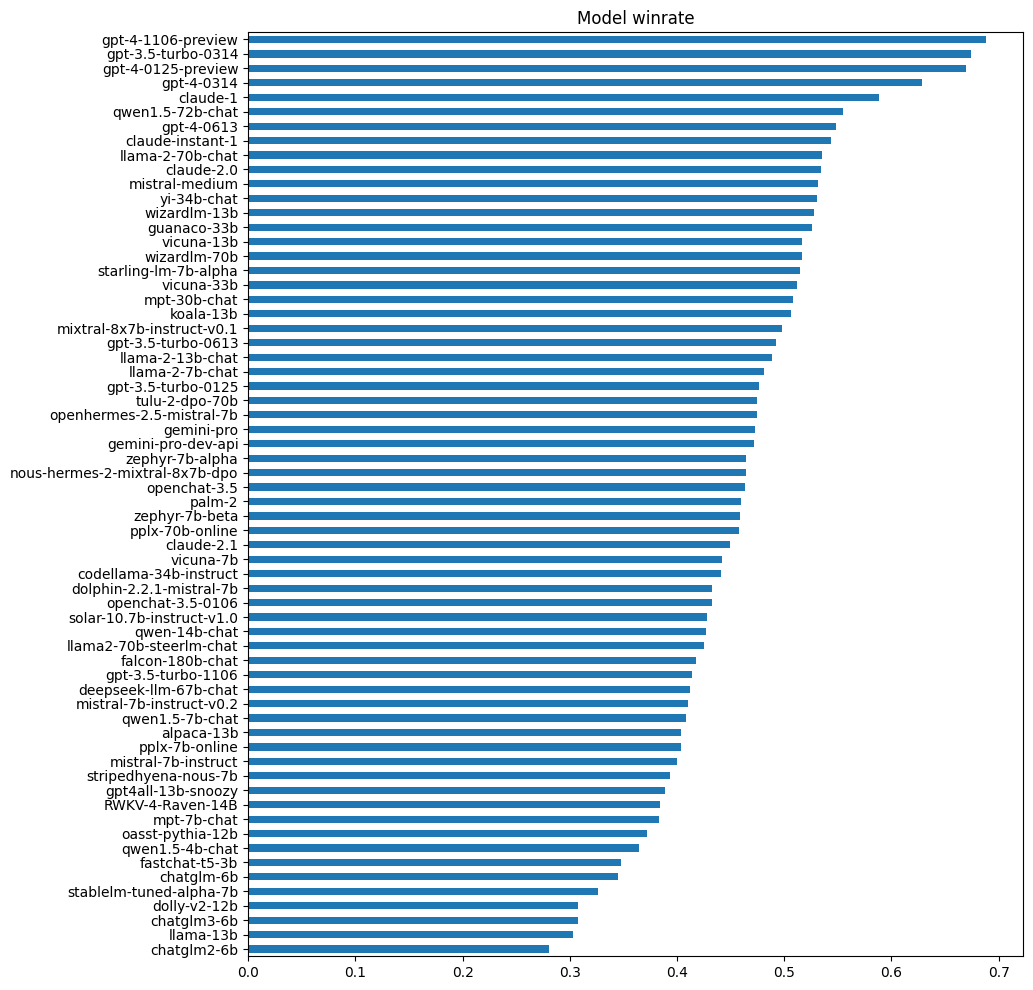

In [14]:
# Visualize model winrate
model_winrate = {model: 0 for model in model_list}
for index, row in train_df.iterrows():
    if row["winner_model_a"] == 1:
        model_winrate[row["model_a"]] += 1
    elif row["winner_model_b"] == 1:
        model_winrate[row["model_b"]] += 1
    else:
        model_winrate[row["model_a"]] += 0.5
        model_winrate[row["model_b"]] += 0.5
model_game_count = {model: 0 for model in model_list}
for index, row in train_df.iterrows():
    model_game_count[row["model_a"]] += 1
    model_game_count[row["model_b"]] += 1
model_winrate = {model: model_winrate[model] / model_game_count[model] for model in model_list}
model_winrate = dict(sorted(model_winrate.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 12))
pd.Series(model_winrate).sort_values().plot(kind="barh")
plt.title("Model winrate")
plt.show()

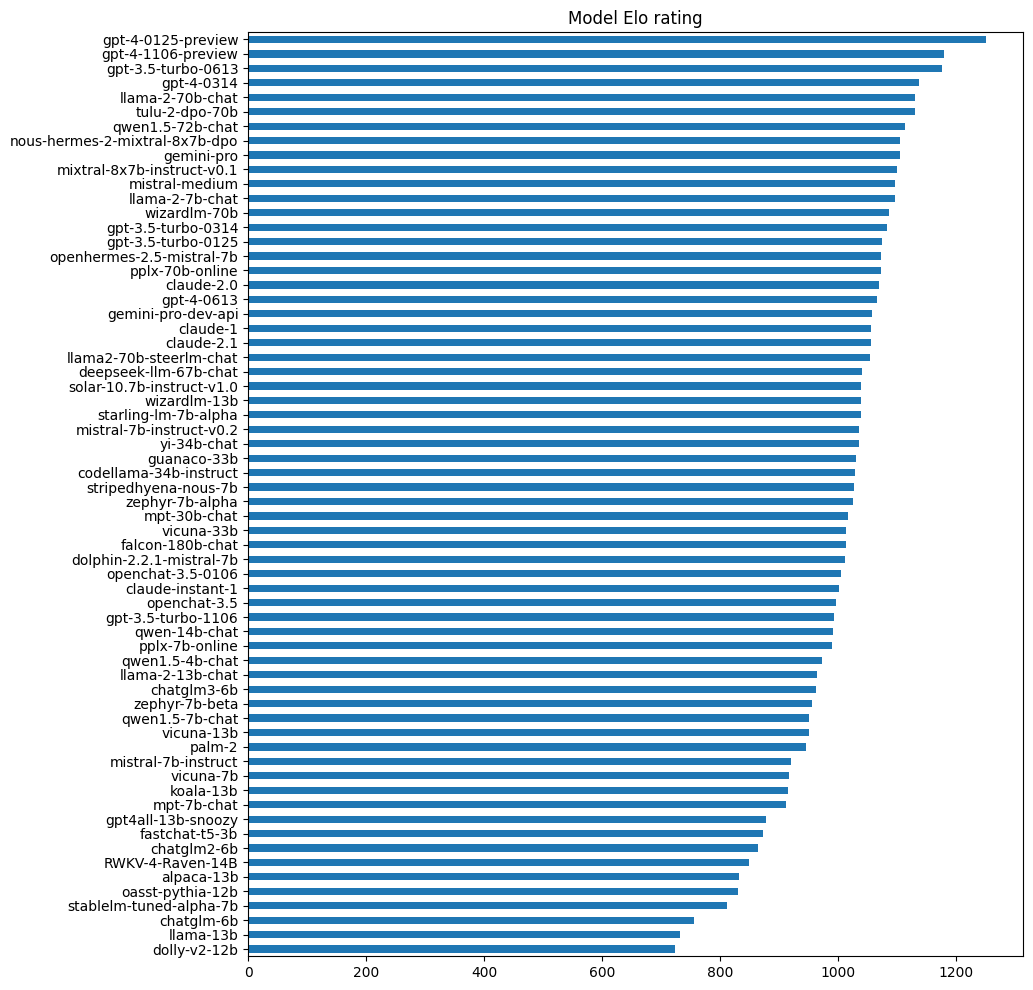

In [15]:
# Model Elo rating
model_elo_rating = {model: 1000 for model in model_list}
K = 32
for index, row in train_df.iterrows():
    model_a = row["model_a"]
    model_b = row["model_b"]
    elo_a = model_elo_rating[model_a]
    elo_b = model_elo_rating[model_b]
    if row["winner_model_a"] == 1:
        elo_a = elo_a + K * (1 - 1 / (1 + 10 ** ((elo_b - elo_a) / 400)))
        elo_b = elo_b + K * (0 - 1 / (1 + 10 ** ((elo_a - elo_b) / 400)))
    elif row["winner_model_b"] == 1:
        elo_a = elo_a + K * (0 - 1 / (1 + 10 ** ((elo_b - elo_a) / 400)))
        elo_b = elo_b + K * (1 - 1 / (1 + 10 ** ((elo_a - elo_b) / 400)))
    else:
        elo_a = elo_a + K * (0.5 - 1 / (1 + 10 ** ((elo_b - elo_a) / 400)))
        elo_b = elo_b + K * (0.5 - 1 / (1 + 10 ** ((elo_a - elo_b) / 400)))
    model_elo_rating[model_a] = elo_a
    model_elo_rating[model_b] = elo_b
model_elo_rating = dict(sorted(model_elo_rating.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10, 12))
pd.Series(model_elo_rating).sort_values().plot(kind="barh")
plt.title("Model Elo rating")
plt.show()

## Preprocessing

In [15]:
###############################################################
###### Factors that affect may affect response preference #####
###############################################################
# 1. Model
# 2. Response Length

## Test Dataset

In [16]:
# Display test dataset info
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3 non-null      int64 
 1   prompt      3 non-null      object
 2   response_a  3 non-null      object
 3   response_b  3 non-null      object
dtypes: int64(1), object(3)
memory usage: 228.0+ bytes


None

In [17]:
# Display the test dataset
display(test_df.head())

,id,prompt,response_a,response_b
0,136060,"[""I have three oranges today, I ate an orange ...","[""You have two oranges today.""]","[""You still have three oranges. Eating an oran..."
1,211333,"[""You are a mediator in a heated political deb...","[""Thank you for sharing the details of the sit...","[""Mr Reddy and Ms Blue both have valid points ..."
2,1233961,"[""How to initialize the classification head wh...","[""When you want to initialize the classificati...","[""To initialize the classification head when p..."
